pandas (http://pandas.pydata.org/) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

It's common to see pandas, numpy and matplotlib imported this way. We also have to specify that we would like generated images to be presented on this page. There are configuration options for Jupyter to do this automatically.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First let's revisit the data we gathered earlier. We created a list of lists which pair up an IP address and how many times that IP address was seen in an nginx access log file.

In [2]:
ip_count = !cat access.log | awk '{print $1}' | sort | uniq -c | sort -rn
ip_count = [line.strip() for line in ip_count]
ip_count = [line.split() for line in ip_count][:10]
ip_count

[['206', '64.134.25.220'],
 ['138', '70.114.7.38'],
 ['115', '70.125.133.107'],
 ['109', '61.219.149.7'],
 ['93', '70.114.8.49'],
 ['80', '24.153.162.178'],
 ['50', '72.32.146.52'],
 ['47', '72.3.128.84'],
 ['46', '50.56.228.100'],
 ['46', '38.103.208.94']]

Now we want to take this data and have pandas be able to do something with it. We begin by creating a "DataFrame" from the 'histogram' variable. DataFrames (DF from here on) are essentially spreadsheets that pandas can do some work on.

A common idiom in pandas is to use the 'head' and 'tail' functions to get a quick peek at the DF without having to load the entire thing (especially useful if your DF is large).

In [3]:
df = pd.DataFrame(ip_count, columns=['count', 'IP'])
df.head()

,count,IP
0,206,64.134.25.220
1,138,70.114.7.38
2,115,70.125.133.107
3,109,61.219.149.7
4,93,70.114.8.49


We can have pandas well us some information about the DF like what type of objects it's comprised of.

In [4]:
df.dtypes

count    object
IP       object
dtype: object

Uh-oh. We won't be able to do useful work unless pandas recognizes the 'count' column as a numeric type. Here's a brief interlude on pandas dtypes: (from http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes )

In [5]:
from pandas import Timestamp, Series
dft = pd.DataFrame(dict( A = np.random.rand(3),
                         B = 1,
                         C = 'foo',
                         D = Timestamp('20010102'),
                         E = Series([1.0]*3).astype('float32'),
                         F = False,
                         G = Series([1]*3,dtype='int8')))
dft.head()

,A,B,C,D,E,F,G
0,0.221418,1,foo,2001-01-02,1,False,1
1,0.852924,1,foo,2001-01-02,1,False,1
2,0.330007,1,foo,2001-01-02,1,False,1


Columns with string data are represented as the 'object' dtype. We'll need to coerce the data into integers to work with them further.

In [6]:
dft.dtypes

A           float64
B             int64
C            object
D    datetime64[ns]
E           float32
F              bool
G              int8
dtype: object

To get column 'count' to integers we can 'apply' a function to a column:

In [7]:
df['count'] = df['count'].apply(int)
df.dtypes

count     int64
IP       object
dtype: object

In [8]:
df.head()

,count,IP
0,206,64.134.25.220
1,138,70.114.7.38
2,115,70.125.133.107
3,109,61.219.149.7
4,93,70.114.8.49


Now we can make a simple plot:

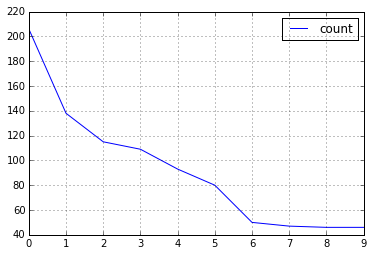

In [9]:
df.plot()

Yeah, not what we wanted at all. It  Let's start by sorting the columns:

Now we can plot with the proper type of visualization for this data. We have to specify which data we expect to have plotted against the count data.

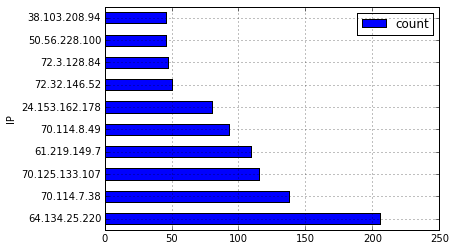

In [10]:
df.plot(kind='barh', x=df['IP'])

Ok, closer but I'd like to have the IP with the most hits at the top. We can perform transformations on the data then plot that transformed data without having to save the intermediate results.

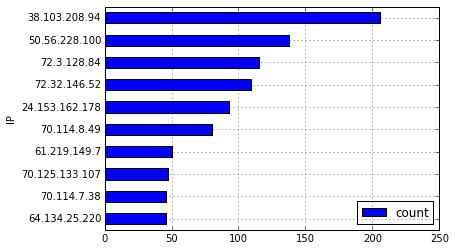

In [11]:
df.sort(columns='count', ascending=True).plot(kind='barh', x=df['IP'])

From here we can start styling the graph to reduce visual noise and making it more visually appealing.

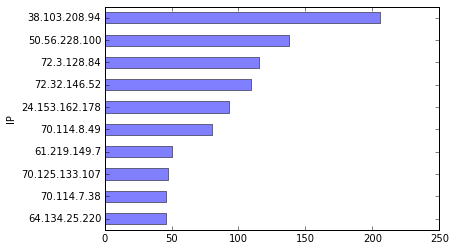

In [12]:
df.sort(columns='count', ascending=True).plot(kind='barh', x=df['IP'], grid=False, legend=False, alpha=0.5)

If we put this plot object into a variable we have more options available to us to configure it's appearance:

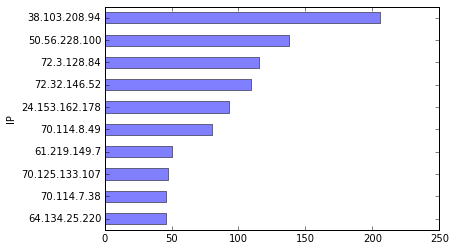

In [13]:
ax = df.sort(columns='count', ascending=True).plot(kind='barh', x=df['IP'], grid=False, legend=False, alpha=0.5)

In [14]:
ymin, ymax = ax.get_ylim()
ax.vlines(x=df['count'].mean(), ymin=ymin, ymax=ymax, color='r')